In [1]:
import numpy as np
import os
import sys
import pickle
from graph_viz_utils import *

# Visualize distance graph

In [4]:
with open('../data/electrode_graph/adj_mx_3d.pkl', 'rb') as pf:
    adj_mx_data = pickle.load(pf)

In [7]:
print(adj_mx_data)

[['EEG FP1', 'EEG FP2', 'EEG F3', 'EEG F4', 'EEG C3', 'EEG C4', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG T5', 'EEG T6', 'EEG FZ', 'EEG CZ', 'EEG PZ'], {'EEG FP1': 0, 'EEG FP2': 1, 'EEG F3': 2, 'EEG F4': 3, 'EEG C3': 4, 'EEG C4': 5, 'EEG P3': 6, 'EEG P4': 7, 'EEG O1': 8, 'EEG O2': 9, 'EEG F7': 10, 'EEG F8': 11, 'EEG T3': 12, 'EEG T4': 13, 'EEG T5': 14, 'EEG T6': 15, 'EEG FZ': 16, 'EEG CZ': 17, 'EEG PZ': 18}, array([[1.        , 0.24243228, 0.24135648, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24237573, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08801569, 0.        , 0.        ],
       [0.24243228, 1.        , 0.        , 0.24135648, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24237573, 0.        , 0.        , 0.        ,
        0.        , 0.08801569, 0.        , 0.        ],
       [0.24135648, 0. 

In [8]:
# Pre-computed adjacency matrix for distance graph
adj_mx = adj_mx_data[2]
adj_mx.shape

(19, 19)

In [10]:
# Remove "EEG" in the node name
node_id_dict = {}
for key, val in adj_mx_data[1].items():
    key = key.split(' ')[-1]
    node_id_dict[key] = val
node_id_dict

{'FP1': 0,
 'FP2': 1,
 'F3': 2,
 'F4': 3,
 'C3': 4,
 'C4': 5,
 'P3': 6,
 'P4': 7,
 'O1': 8,
 'O2': 9,
 'F7': 10,
 'F8': 11,
 'T3': 12,
 'T4': 13,
 'T5': 14,
 'T6': 15,
 'FZ': 16,
 'CZ': 17,
 'PZ': 18}

In [5]:
# Get positions of nodes
pos_spec = get_spectral_graph_positions()

In [12]:
file = '../data/electrode_graph/adj_mx_3d.pkl'

with open(file, 'rb') as f:
    adj_mx_all = pickle.load(f)
adj_mx = adj_mx_all[-1]

node_id_dict = adj_mx_all[1]

In [14]:
eeg_viz = nx.Graph()

Graph with 0 nodes and 0 edges


In [15]:
adj_mx = adj_mx_all[-1]
node_id_label = collections.defaultdict()
print(node_id_label)

defaultdict(None, {})


In [16]:
for i in range(adj_mx.shape[0]):
    eeg_viz.add_node(i)
print(eeg_viz)

Graph with 19 nodes and 0 edges


In [17]:
for k, v in node_id_dict.items():
    node_id_label[v] = k
print(node_id_label)

defaultdict(None, {0: 'EEG FP1', 1: 'EEG FP2', 2: 'EEG F3', 3: 'EEG F4', 4: 'EEG C3', 5: 'EEG C4', 6: 'EEG P3', 7: 'EEG P4', 8: 'EEG O1', 9: 'EEG O2', 10: 'EEG F7', 11: 'EEG F8', 12: 'EEG T3', 13: 'EEG T4', 14: 'EEG T5', 15: 'EEG T6', 16: 'EEG FZ', 17: 'EEG CZ', 18: 'EEG PZ'})


In [18]:
# Add edges
for i in range(adj_mx.shape[0]):
    for j in range(
            adj_mx.shape[1]):  # do no include self-edge in visualization
        if i != j and adj_mx[i, j] > 0:
            eeg_viz.add_edge(i, j)
print(eeg_viz)

Graph with 19 nodes and 36 edges


In [19]:
pos = nx.spectral_layout(eeg_viz)
print(pos)

{0: array([-0.84133255,  0.31826822]), 1: array([-0.84133255, -0.31826822]), 2: array([-0.64751813,  0.54171506]), 3: array([-0.64751813, -0.54171506]), 4: array([5.12291988e-15, 6.36536432e-01]), 5: array([-6.00064101e-15, -6.36536432e-01]), 6: array([0.64751813, 0.54171506]), 7: array([ 0.64751813, -0.54171506]), 8: array([0.84133255, 0.31826822]), 9: array([ 0.84133255, -0.31826822]), 10: array([-0.6360114 ,  0.81826822]), 11: array([-0.6360114 , -0.81826822]), 12: array([9.31039573e-15, 1.00000000e+00]), 13: array([-9.30265944e-15, -1.00000000e+00]), 14: array([0.6360114 , 0.81826822]), 15: array([ 0.6360114 , -0.81826822]), 16: array([-6.85961172e-01,  6.67021463e-15]), 17: array([2.85186813e-16, 2.49357848e-17]), 18: array([ 6.85961172e-01, -7.14384236e-15])}


In [20]:
# keep the nice shape of the electronodes on the scalp
pos_spec = {node: (y, -x) for (node, (x, y)) in pos.items()}
print(pos_spec)

{0: (0.31826821576692643, 0.841332549208287), 1: (-0.3182682157669079, 0.8413325492082935), 2: (0.5417150602036677, 0.6475181290977535), 3: (-0.5417150602036535, 0.6475181290977642), 4: (0.6365364315338323, -5.1229198780926574e-15), 5: (-0.6365364315338331, 6.000641008575384e-15), 6: (0.5417150602036536, -0.6475181290977636), 7: (-0.5417150602036662, -0.6475181290977532), 8: (0.3182682157669084, -0.8413325492082928), 9: (-0.31826821576692427, -0.8413325492082875), 10: (0.8182682157669221, 0.6360113993583838), 11: (-0.81826821576691, 0.6360113993584003), 12: (0.9999999999999973, -9.310395729487931e-15), 13: (-0.9999999999999999, 9.302659436947412e-15), 14: (0.8182682157669093, -0.6360113993584001), 15: (-0.8182682157669221, -0.6360113993583836), 16: (6.670214630497975e-15, 0.6859611722346878), 17: (2.4935784826905948e-17, -2.8518681331538974e-16), 18: (-7.143842361686847e-15, -0.6859611722346893)}


In [21]:
is_directed = False
title=''
save_dir=None
fig_size=(12, 8)
node_color='Red'
font_size=20
plot_colorbar=False
"""
    Draw a graph with weighted edges
    Args:
        adj_mx: Adjacency matrix for the graph, shape (num_nodes, num_nodes
        node_id_dict: dict, key is node name, value is node index
        pos_spec: Graph node position specs from function get_spectral_graph_positions
        is_directed: If True, draw directed graphs
        title: str, title of the figure
        save_dir: Dir to save the plot
        fig_size: figure size
"""

'\n    Draw a graph with weighted edges\n    Args:\n        adj_mx: Adjacency matrix for the graph, shape (num_nodes, num_nodes\n        node_id_dict: dict, key is node name, value is node index\n        pos_spec: Graph node position specs from function get_spectral_graph_positions\n        is_directed: If True, draw directed graphs\n        title: str, title of the figure\n        save_dir: Dir to save the plot\n        fig_size: figure size\n'

In [22]:
eeg_viz = nx.DiGraph() if is_directed else nx.Graph()
node_id_label = collections.defaultdict()

for i in range(adj_mx.shape[0]):
    eeg_viz.add_node(i)

for k, v in node_id_dict.items():
    node_id_label[v] = k

# Add edges
for i in range(adj_mx.shape[0]):
    for j in range(adj_mx.shape[1]):  # since it's now directed
        if i != j and adj_mx[i, j] > 0:
            eeg_viz.add_edge(i, j, weight=adj_mx[i, j])

In [24]:
edges, weights = zip(*nx.get_edge_attributes(eeg_viz, 'weight').items())
print(edges)
print(weights)

((0, 1), (0, 2), (0, 10), (0, 16), (1, 3), (1, 11), (1, 16), (2, 4), (2, 10), (2, 16), (3, 5), (3, 11), (3, 16), (4, 6), (4, 12), (4, 17), (5, 7), (5, 13), (5, 17), (6, 8), (6, 14), (6, 18), (7, 9), (7, 15), (7, 18), (8, 9), (8, 14), (8, 18), (9, 15), (9, 18), (10, 12), (11, 13), (12, 14), (13, 15), (16, 17), (17, 18))
(0.24243228, 0.24135648, 0.24237573, 0.08801569, 0.24135648, 0.24237573, 0.08801569, 0.14517006, 0.30257306, 0.27650845, 0.14517006, 0.30257306, 0.27650845, 0.14517006, 0.11379092, 0.11379092, 0.14517006, 0.11379092, 0.11379092, 0.24135648, 0.30257306, 0.27650845, 0.24135648, 0.30257306, 0.27650845, 0.24243228, 0.24237573, 0.08801569, 0.24237573, 0.08801569, 0.24237305, 0.24237305, 0.24237305, 0.24237305, 0.11379092, 0.11379092)


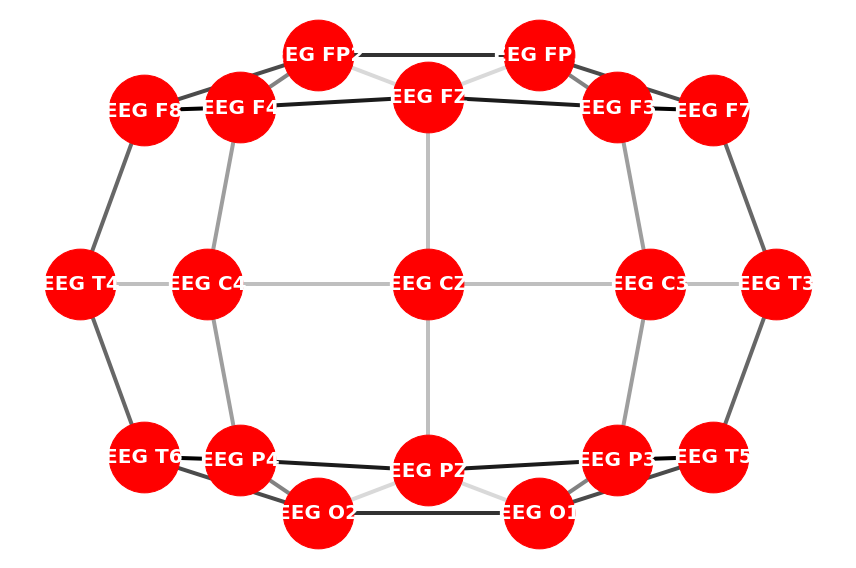

In [25]:
# Change the color scales below
k = 3
cmap = plt.cm.Greys(np.linspace(0, 1, (k + 1) * len(weights)))
cmap = matplotlib.colors.ListedColormap(cmap[len(weights):-1:(k - 1)])

plt.figure(figsize=fig_size)
nx.draw_networkx(eeg_viz, pos_spec, labels=node_id_label, with_labels=True,
                 edgelist=edges, edge_color=rankdata(weights),
                 width=fig_size[1] / 2, edge_cmap=cmap, font_weight='bold',
                 node_color=node_color,
                 node_size=250 * (fig_size[0] + fig_size[1]),
                 font_color='white',
                 font_size=font_size)
plt.title(title, fontsize=font_size)
plt.axis('off')
if plot_colorbar:
    sm = plt.cm.ScalarMappable(
        cmap=cmap, norm=plt.Normalize(
            vmin=0, vmax=1))
    sm.set_array([])
    plt.colorbar(sm)
plt.tight_layout()
if save_dir is not None:
    plt.savefig(save_dir, dpi=300)

plt.show()

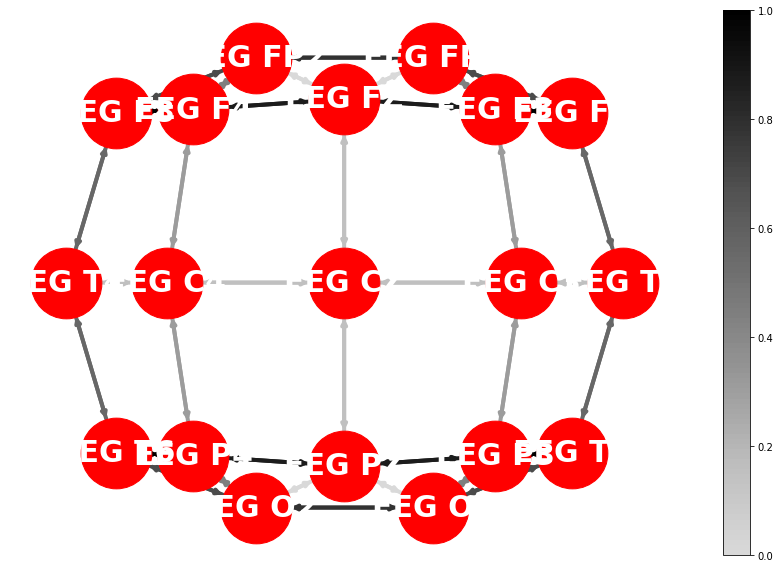

In [26]:
draw_graph_weighted_edge(adj_mx, node_id_dict, pos_spec, is_directed=True, plot_colorbar=True, font_size=30)

# Visualize correlation graphs

Similarly, you can use `draw_graph_weighted_edge` function to visualize correlation graphs by specifying the corresponding `adj_mx` and `is_directed = True`. To get adjacency matrices for correlation graphs, you can use the corresponding dataloader in `../data` folder.